# SF Salaries
#### Exploring SF City Employee Salaries
(Data Obtained from https://www.kaggle.com/kaggle/sf-salaries)

###### Import Required Modules

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style('darkgrid')
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
%matplotlib inline

###### Read & Get Overview

In [18]:
data = pd.read_csv('Salaries.csv')
data.head(2)

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


Now, as it appears: 
- BasePay, OvertimePay, OtherPay & Benefits - must be numeric values.
- Notes & Agency - do not provide any useful information and must be dropeed.

In [20]:
data.drop(['Notes','Agency'],axis=1, inplace=True)
data.head(2)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN


### Exploring Total Pay
###### By Year (Kernel Density Estimate)

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


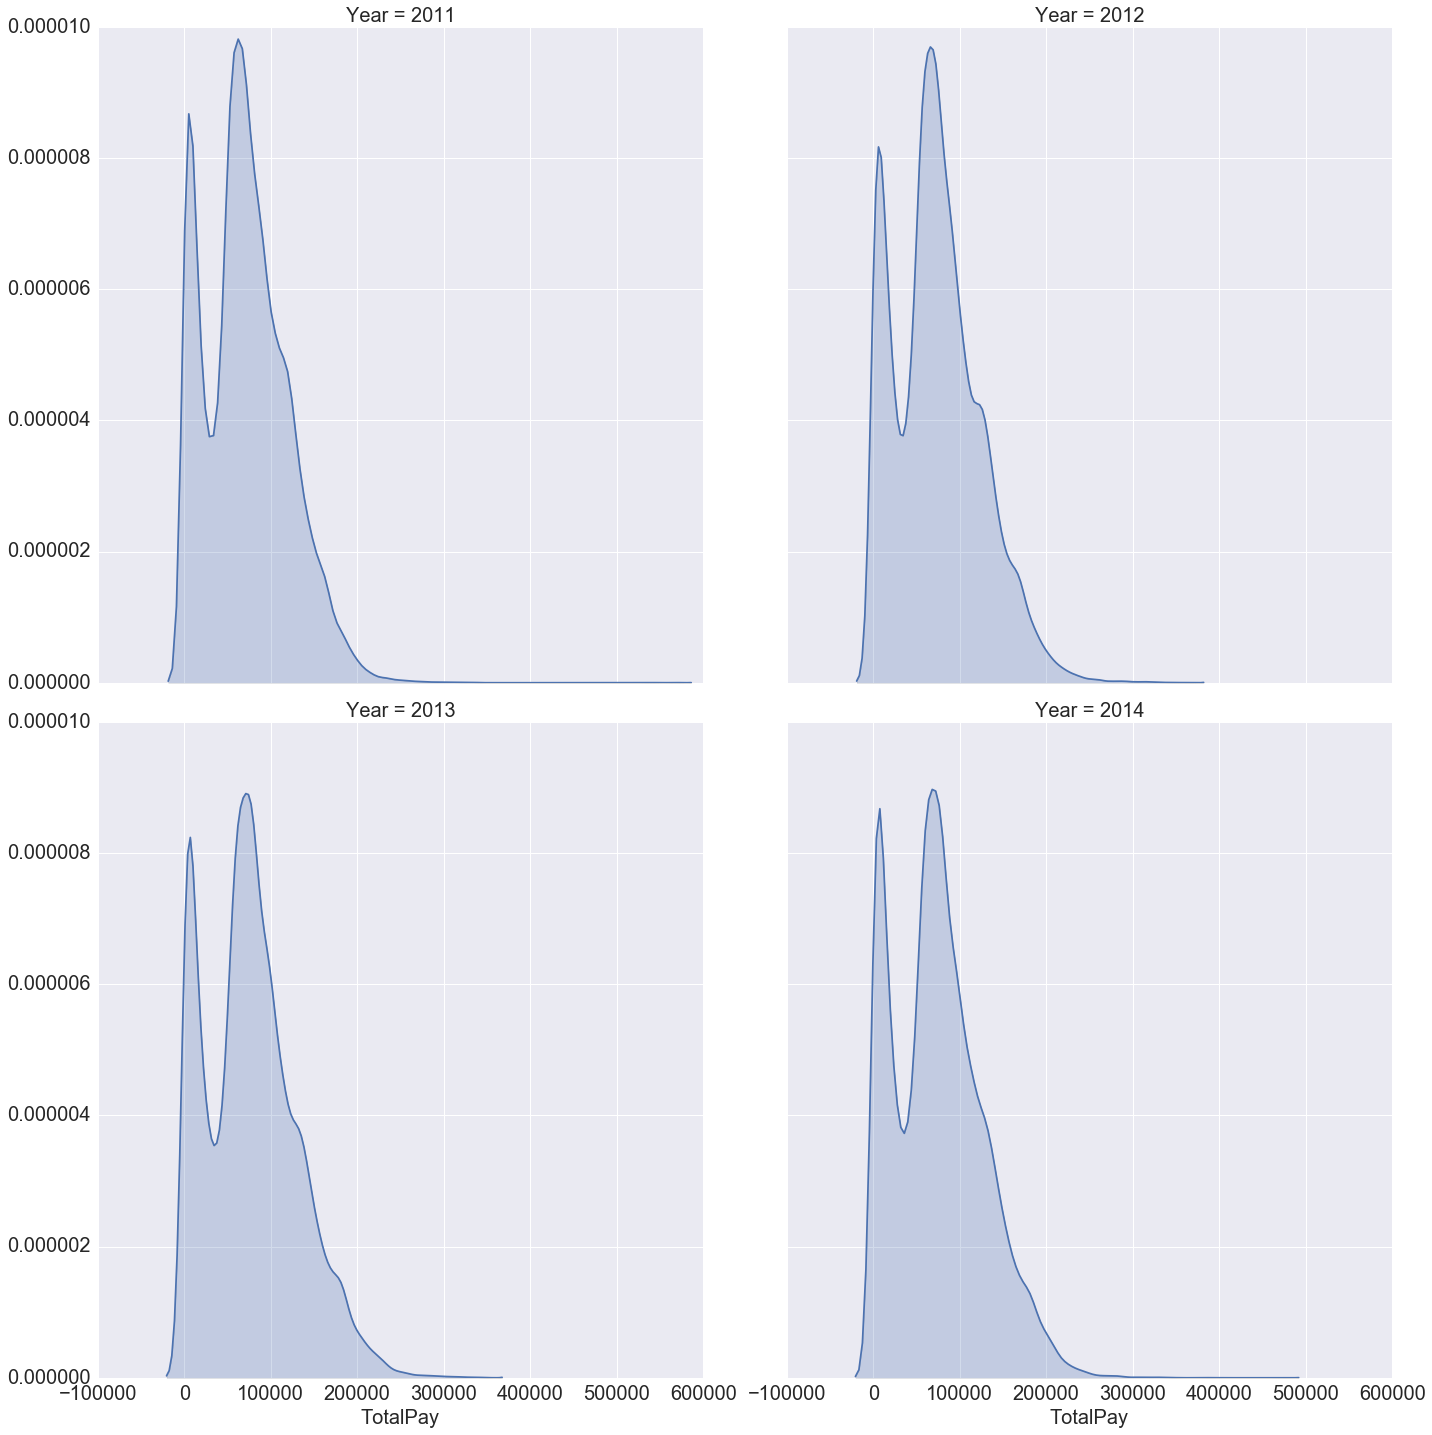

In [24]:
F = sns.FacetGrid(data, col='Year', size = 10, dropna=True, col_wrap=2)
F.map(sns.kdeplot, 'TotalPay', shade=True)

Markets are largely looking stable since there isn't much change in the nature of total payout by the govt from 2011-2014. But what about the pay with respect to the kind of job people are engaged in?

In [25]:
data['Status'].unique()

array([nan, 'PT', 'FT'], dtype=object)

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


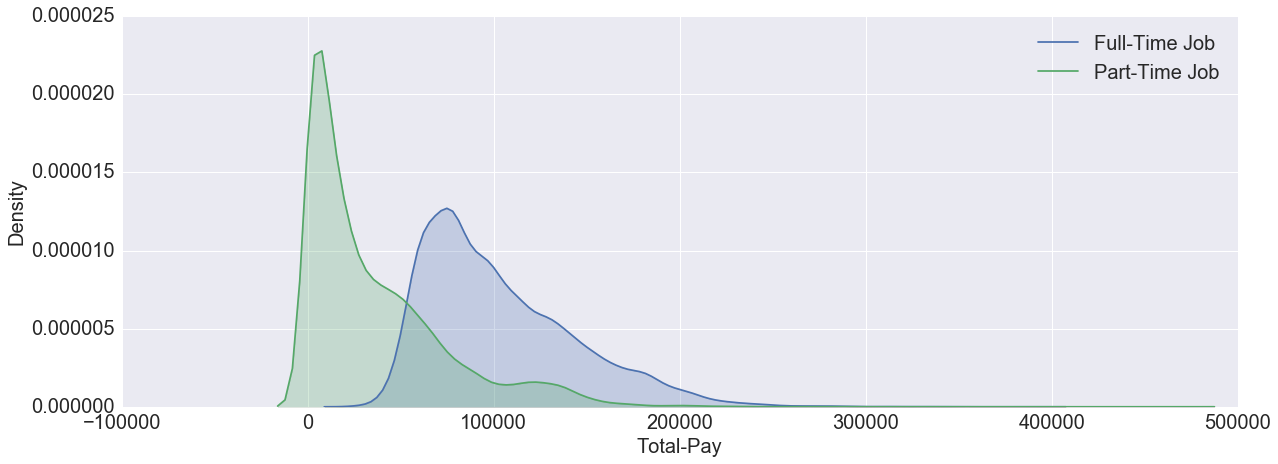

In [30]:
FT = data[data['Status'] == 'FT']
PT = data[data['Status'] == 'PT']
plt.figure(figsize=(20,7))
sns.kdeplot(FT['TotalPay'].dropna(), label = 'Full-Time Job', shade = True)
sns.kdeplot(PT['TotalPay'].dropna(), label = 'Part-Time Job', shade = True)
plt.xlabel('Total-Pay')
plt.ylabel('Density')
plt.legend()